### Problem 4

Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and life expectancy over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.) 

Visualize the model(s) and comment on what they tell you about the relationship between income and life expectancy over time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get data on gdp and life expectancy
all_gdp = pd.read_csv("/Users/alefiyanaseem/Desktop/Data Visualization/ddf--gapminder--systema_globalis/ddf--datapoints--alternative_gdp_per_capita_ppp_pwt_8_0--by--geo--time.csv")
all_life = pd.read_csv("/Users/alefiyanaseem/Desktop/Data Visualization/ddf--gapminder--systema_globalis/ddf--datapoints--life_expectancy_years--by--geo--time.csv")

In [3]:
for col in all_gdp.columns[:-1]:
    assert all_gdp[col].dtype == all_life[col].dtype

In [4]:
gdp_life = pd.merge(all_gdp, all_life, how = 'left', left_on = ["geo", "time"], right_on = ["geo", "time"])

In [5]:
gdp_life = gdp_life.rename({'alternative_gdp_per_capita_ppp_pwt_8_0':'gdp', 'life_expectancy_years':'life_expectancy'}, axis = 1)

In [6]:
# Eliminate data where gpd or life expectancy is 0
gdp_life = gdp_life[(gdp_life["gdp"] > 0) & (gdp_life["life_expectancy"] > 0)]

In [7]:
all_country = pd.read_csv('/Users/alefiyanaseem/Desktop/Data Visualization/ddf--gapminder--systema_globalis/ddf--entities--geo--country.csv')

In [8]:
gdp_life = pd.merge(gdp_life,all_country[['country', 'world_4region']], left_on = 'geo', right_on = 'country')

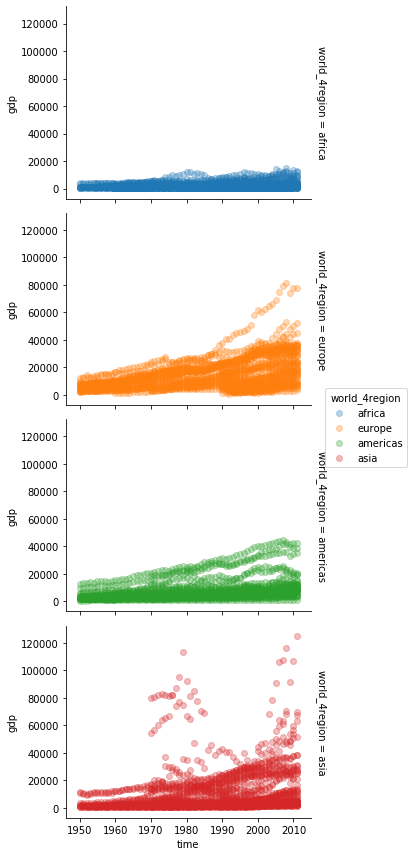

In [9]:
import seaborn as sns
fg = sns.FacetGrid(data=gdp_life[['gdp',
                                  'time', 'world_4region']],
                       hue='world_4region', row = 'world_4region',
                       margin_titles = True,
                       aspect=1.61)

fg.map(plt.scatter, 'time', 'gdp',
        alpha = 0.3).add_legend()

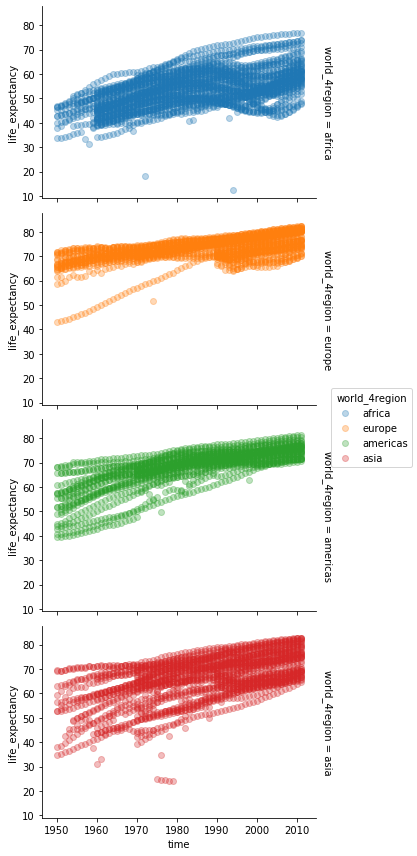

In [10]:
import seaborn as sns
fg = sns.FacetGrid(data=gdp_life[['life_expectancy',
                                  'time', 'world_4region']],
                       hue='world_4region', row = 'world_4region',
                       margin_titles = True,
                       aspect=1.61)

fg.map(plt.scatter, 'time', 'life_expectancy',
        alpha = 0.3).add_legend()

In [11]:
# Group by time
gdp_life_group = gdp_life.groupby("time").mean()

In [12]:
gdp_life_group

,gdp,life_expectancy
time,,
1950,4237.586792,56.215283
1951,4183.511864,56.559322
1952,4191.345000,57.091667
1953,4222.711290,57.463548
1954,4222.372727,57.712576
1955,4272.982857,57.677429
1956,4400.392857,58.132714
1957,4492.281429,58.484571
1958,4504.048571,59.091000


There's a clear linear relationship just by observing the data. So we'll first plot a linear regression to check fit (even though this seems naive as theres a temporal correlation here too). Let's treat this as a baseline.

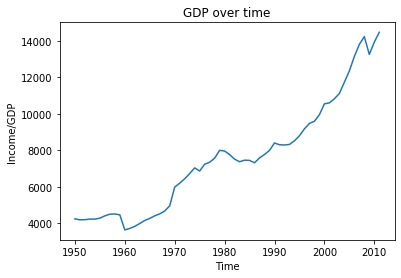

In [13]:
plt.plot(gdp_life_group["gdp"])
plt.title("GDP over time")
plt.xlabel("Time")
plt.ylabel("Income/GDP")
plt.show()

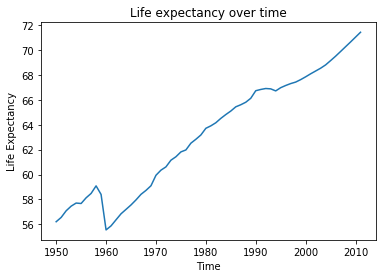

In [14]:
plt.plot(gdp_life_group["life_expectancy"])
plt.title("Life expectancy over time")
plt.xlabel("Time")
plt.ylabel("Life Expectancy")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(gdp_life_group["life_expectancy"].to_numpy().reshape(-1,1)
                                                    , gdp_life_group["gdp"].to_numpy().reshape(-1,1), 
    test_size=0.3,random_state =1 )
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.8938911486584065
Residual sum of squares: 1136803.06


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


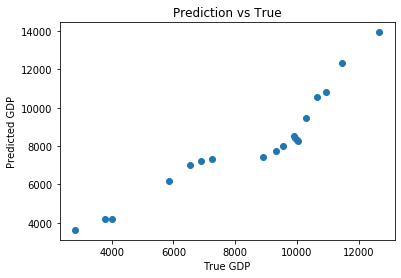

In [17]:
plt.scatter(grid.predict(X_test),y_test)
plt.title("Prediction vs True")
plt.xlabel("True GDP")
plt.ylabel("Predicted GDP")
plt.show()

In [18]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=gdp_life_group)
model_fit = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(gdp_life_group["life_expectancy"].to_numpy().reshape(-1,1)))

/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [21]:
#converting predictions to dataframe
cols = gdp_life_group.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=cols)
for j in range(0,2):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], gdp_life_group[i])))

rmse value for gdp is :  34745.43871925074
rmse value for life_expectancy is :  39.6403417789872


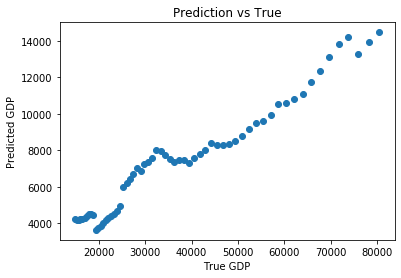

In [22]:
plt.scatter(pred["gdp"], gdp_life_group["gdp"])
plt.title("Prediction vs True")
plt.xlabel("True GDP")
plt.ylabel("Predicted GDP")
plt.show()

There's a slightly better fit here if we use an algorithm that takes into account the temporal relationship (also fit over larger data) but the trend is clear: as income(GDP/capita) and time went up, so did life expectancy. This is intuitive as better living standards are attainable with better income, which in turn cause life expectancy to increase. This could be attributed to the advancement in technology and better healthcare options such as vaccines. Income has a more direct connection with  increase in life expectancy with countries having a higher GDP which could be attributed to the availability of more sophisticated healthcare system in those countries.